In [32]:
import numpy as np 
import pandas as pd 

from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white") #white background style for seaborn plots
sns.set(style="whitegrid", color_codes=True)

import warnings
warnings.simplefilter(action='ignore')

In [33]:
data = pd.read_csv("https://raw.githubusercontent.com/abdullabasim/dataset/main/Pumpkin_Seeds_Dataset.csv")


In [34]:
data.head()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
0,56276,888.242,326.1485,220.2388,56831,267.6805,0.7376,0.9902,0.7453,0.8963,1.4809,0.8207,Çerçevelik
1,76631,1068.146,417.1932,234.2289,77280,312.3614,0.8275,0.9916,0.7151,0.8440,1.7811,0.7487,Çerçevelik
2,71623,1082.987,435.8328,211.0457,72663,301.9822,0.8749,0.9857,0.7400,0.7674,2.0651,0.6929,Çerçevelik
3,66458,992.051,381.5638,222.5322,67118,290.8899,0.8123,0.9902,0.7396,0.8486,1.7146,0.7624,Çerçevelik
4,66107,998.146,383.8883,220.4545,67117,290.1207,0.8187,0.9850,0.6752,0.8338,1.7413,0.7557,Çerçevelik


In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area               2500 non-null   int64  
 1   Perimeter          2500 non-null   float64
 2   Major_Axis_Length  2500 non-null   float64
 3   Minor_Axis_Length  2500 non-null   float64
 4   Convex_Area        2500 non-null   int64  
 5   Equiv_Diameter     2500 non-null   float64
 6   Eccentricity       2500 non-null   float64
 7   Solidity           2500 non-null   float64
 8   Extent             2500 non-null   float64
 9   Roundness          2500 non-null   float64
 10  Aspect_Ration      2500 non-null   float64
 11  Compactness        2500 non-null   float64
 12  Class              2500 non-null   object 
dtypes: float64(10), int64(2), object(1)
memory usage: 254.0+ KB


In [36]:
data.describe()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness
count,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000
mean,80658.220800,1130.279015,456.601840,225.794921,81508.084400,319.334230,0.860879,0.989492,0.693205,0.791533,2.041702,0.704121
std,13664.510228,109.256418,56.235704,23.297245,13764.092788,26.891920,0.045167,0.003494,0.060914,0.055924,0.315997,0.053067
min,47939.000000,868.485000,320.844600,152.171800,48366.000000,247.058400,0.492100,0.918600,0.468000,0.554600,1.148700,0.560800
25%,70765.000000,1048.829750,414.957850,211.245925,71512.000000,300.167975,0.831700,0.988300,0.658900,0.751900,1.801050,0.663475
50%,79076.000000,1123.672000,449.496600,224.703100,79872.000000,317.305350,0.863700,0.990300,0.713050,0.797750,1.984200,0.707700
75%,89757.500000,1203.340500,492.737650,240.672875,90797.750000,338.057375,0.897025,0.991500,0.740225,0.834325,2.262075,0.743500
max,136574.000000,1559.450000,661.911300,305.818000,138384.000000,417.002900,0.948100,0.994400,0.829600,0.939600,3.144400,0.904900


In [37]:
data['Class'].value_counts()

Çerçevelik       1300
Ürgüp Sivrisi    1200
Name: Class, dtype: int64

In [38]:
data = pd.get_dummies(data = data , columns= ['Class'],drop_first=True ,prefix_sep='')

In [39]:
data.rename(columns={'ClassÜrgüp Sivrisi': 'Class'},inplace=True)

In [40]:
data.head()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
0,56276,888.242,326.1485,220.2388,56831,267.6805,0.7376,0.9902,0.7453,0.8963,1.4809,0.8207,0
1,76631,1068.146,417.1932,234.2289,77280,312.3614,0.8275,0.9916,0.7151,0.8440,1.7811,0.7487,0
2,71623,1082.987,435.8328,211.0457,72663,301.9822,0.8749,0.9857,0.7400,0.7674,2.0651,0.6929,0
3,66458,992.051,381.5638,222.5322,67118,290.8899,0.8123,0.9902,0.7396,0.8486,1.7146,0.7624,0
4,66107,998.146,383.8883,220.4545,67117,290.1207,0.8187,0.9850,0.6752,0.8338,1.7413,0.7557,0


Text(0, 0.5, 'Convex_Area')

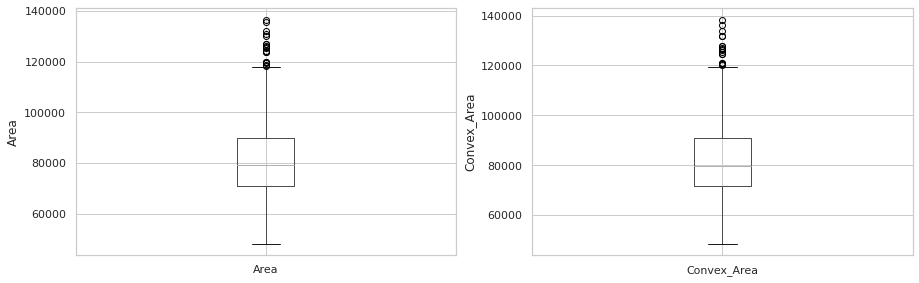

In [41]:
plt.figure(figsize=(15,10))

plt.subplot(2, 2, 1)
fig = data.boxplot(column='Area')
fig.set_title('')
fig.set_ylabel('Area')

plt.subplot(2, 2, 2)
fig = data.boxplot(column='Convex_Area')
fig.set_title('')
fig.set_ylabel('Convex_Area')

<Axes: xlabel='Area', ylabel='Count'>

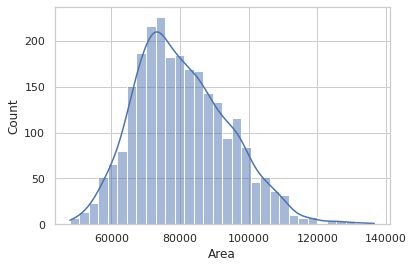

In [42]:
sns.histplot(data=data,x='Area',kde=True) 

<Axes: xlabel='Convex_Area', ylabel='Count'>

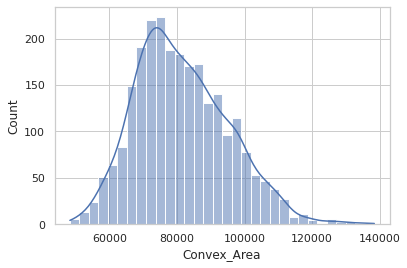

In [43]:
sns.histplot(data=data,x='Convex_Area',kde=True) 

In [44]:
def outlier(df,feature):
    Q1=df[feature].quantile(0.25)
    Q3=df[feature].quantile(0.75)
    IQR=Q3-Q1
    lower_band = Q1 - 1.5 * IQR
    upper_band = Q3 + 1.5 * IQR

    return df.index[(df[feature] < lower_band) | (df[feature] > upper_band)]

In [45]:
Area_list = outlier(data , 'Area')

data.Area = np.where(  (data.index.isin(Area_list)), data.Area.median().astype(int), data.Area )


In [46]:
Convex_Area_list = outlier(data , 'Convex_Area')

data.Convex_Area = np.where(  (data.index.isin(Convex_Area_list)), data.Convex_Area.median().astype(int), data.Convex_Area )


In [47]:
X = data.drop(['Class'], axis=1)
y = data['Class']

In [48]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [49]:
# Applying Grid Search to find the best model and the best parameters
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

classifier = SVC( random_state = 0)

parameters = [
	{"kernel":
		["linear"],
		"C": [0.0001, 0.001, 0.1, 1, 10, 100, 1000]},
	{"kernel":
		["poly"],
		"degree": [2, 3, 4],
		"C": [0.0001, 0.001, 0.1, 1, 10, 100, 1000]},
	{"kernel":
		["rbf"],
		"gamma": ["auto", "scale"],
		"C": [0.0001, 0.001, 0.1, 1, 10, 100, 1000]}
]
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search.fit(X,y)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Best Accuracy: 88.76 %
Best Parameters: {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}


In [50]:
# Training the Kernel SVM model on the Training set

classifier = SVC(C=10,kernel = 'rbf',gamma='auto',random_state = 11)
classifier.fit(X, y)

SVC(C=10, gamma='auto', random_state=11)

In [51]:
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X, y = y, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 88.76 %
Standard Deviation: 2.90 %
